boost
[-4386.14522401 -2292.88072321]
[-265.86457243 -138.98211801]


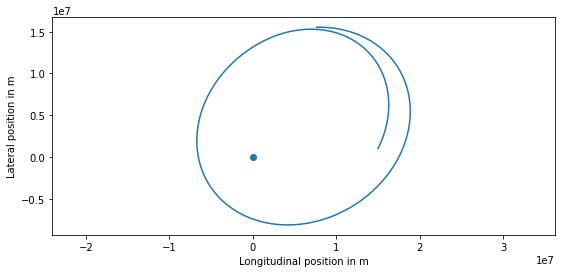

In [8]:
# QUIZ
#
# We need to demonstrate firing the 
# boost rocket at the appropriate 
# time, and show how that alters the 
# trajectory of the capsule! Modify 
# the apply_boost function below to 
# fire the boost rocket 2 hours 
# after start, increasing the speed 
# by 300 m / s in the current 
# direction of travel when you do.
#
# HINT: Use the boolean variable 
# boost_done to store whether or not 
# this boost has occurred.

from udacityplots import *
import numpy as np
import numpy

h = 3.0 # s
earth_mass = 5.97e24 # kg
spacecraft_mass = 30000. # kg
gravitational_constant = 6.67e-11 # N m2 / kg2

# This is used to keep track of the data that we want to plot.
data = []

def acceleration(spaceship_position):
    vector_to_earth = - spaceship_position # earth located at origin
    return gravitational_constant * earth_mass / numpy.linalg.norm(vector_to_earth)**3 * vector_to_earth

def apply_boost():
    num_steps = 7000
    x = numpy.zeros([num_steps + 1, 2]) # m
    v = numpy.zeros([num_steps + 1, 2]) # m / s

    x[0, 0] = 15e6
    x[0, 1] = 1e6    
    v[0, 0] = 2e3
    v[0, 1] = 4e3

    boost_done = False

    for step in range(num_steps):
        if step*3 == 7200 and boost_done == False:
            print('boost')
            print(v[step])
            boost = v[step]/np.linalg.norm(v[step])*300
            print(boost)
            v[step] += boost
            boost_done = True
            ###Your code here.

            # data.append((x[step, 0], x[step, 1]))

        acceleration0 = acceleration(x[step])
        xE = x[step] + h * v[step]
        vE = v[step] + h * acceleration0
        x[step + 1] = x[step] + h * 0.5 * (v[step] + vE)
        v[step + 1] = v[step] + h * 0.5 * (acceleration0 + acceleration(xE))

    return x, v

x, v = apply_boost()

@show_plot
def plot_me():
    for (x_0, x_1) in data:
        matplotlib.pyplot.scatter(x_0, x_1, c = 'r')
    matplotlib.pyplot.plot(x[:, 0], x[:, 1])
    matplotlib.pyplot.scatter(0, 0)
    matplotlib.pyplot.axis('equal')
    axes = matplotlib.pyplot.gca()
    axes.set_xlabel('Longitudinal position in m')
    axes.set_ylabel('Lateral position in m')

plot_me()

